# How to do graphs in a simpler way than using Excel?

## Why would you need it?
Excel is a good tool to show data and do some graphics, but it is limited to very standard graphs.

What if:
* You have very big set of data?
* The data is in a format that needs transformation?
* You need to put several different type of graphs on the same plane?
* You need to zoom on the data or make it interactive?

## The solution I propose

I propose to use a set of tools, all available and very powerful, and based on Python:
* **jupyter** to work on an interactive shell
* **pandas** to manage complex data tables, that you can query.
* **matplotlib** to create graphs from data
* **virtualenv** to easily install python libraries
* **highcharts** to create interactive tables.

## Example of data
The data I use as an example comes from some benchmarks. This is a multi-dimensional table:
* Several suites (specInt2000, specInt2006, etc),
* Several tests per suite
* Several simpoints per test
* For each simpoint, data is listed by "instruction window" (One window for 100000 instructions).

![Example of data](https://confluence.arm.com/download/attachments/101586044/Excel.png?version=1&modificationDate=1483460450297&api=v2)

This means that a single test is split to 100-1000 of lines. The file contains 140k lines only for one suite (SpecInt2000)

This raw data is very useful but not directly useable if I want to get, for example:
* Number of cycles or simpoints per test
* Average IPC per full test or per simpoint
* Dispersion of IPC during full tests
* Split of instructions per test

Or for a single test:
* Variation of IPC during the test
* Variation of instruction ratio during the test

# How to do it?

You need to setup your environment first to be able to use it. Let's do it in steps. You need to

## Virtualenv

virtualenv is not mandatory but very useful. It permits installing a specific version of Python, the libraries we want, in a specific directory. For example, a project might need python 2.7 with some libraries, while another will need python 3.5 with some other libraries. 

The virtualenv will install the python binary, add some scripts to set the environment, then libraries can be installed with `pip`. `virtualenv` needs to be installed on the machine:
```
sudo yum install virtualenv
```

Then you can setup an environment in your directory:
```
virtualenv -p python2.7 venv
```

This will create a directory called `venv` that will contain:
* A `python` binary installed in `venv/bin`, with some libraries pre-installed
* A script to setup the environment:
```
source venv/bin/activate
```

When this script is sourced, the python binary is added first to the path, so that this one will be used. If we install python libraries, they will be installed in the `venv` directory as well.

## Install libraries

Several libraries need to be installed. `pip` is used for it, which is a package management tool for Python.
```
pip install pandas matplotlib openpyxl jupyter pandoc python-highcharts seaborn
```

This is very easy to install new libraries later when required.

Note that you can easily save the list of libraires that have been installed (With the versions):
```
pip freeze > requirements.txt
```

It means that if you need to use this for a project, you should **never** commit the virtualenv directory, but instead:
* Add a `README` file showing the command line to create the virtualenv
* Commit the file `requirements.txt` to install the libraries with this command:
```
pip install -r requirements.txt
```

## Create a Jupyter notebook
`jupyter` (Previously known as `ipython`) permits to create interactive notebooks in which you can:
* Add formatted text
* Add python command
* Look at the output of the commands.

All this text is done in a notebook.

The notebook can then be exported to a lot of other formats (HTML, PDF, etc).

A notebook is very useful when you want to share results (like graphs, tables):
* You can put text to describe how you get the results, the conclusions, limitations, etc. This is far better than raw tables or graphs.
* We see the outputs of the python commands, which can be graphs, tables, images. Anything actually. For example:

In [1]:
2**5
lis1 = [0, 1, 2, 3]
lis2 = [4, 5, 6, 7]

list(zip(lis1, lis2))

[(0, 4), (1, 5), (2, 6), (3, 7)]

* This is reproducible: you can save the notebook (.ypnb) and the data to a Jira or on confluence, and anyone can use it, run it, modify it.

To create a notebook, type this in the virtualenv directory:
```
jupyter notebook
```

This will list all the files in the current directory. You can create a new notebook or open an existing one.

Alternatively, you can directly open a specific notebook:
```
jypiter notebook <file>.ypnb
```

# What is pandas?
As stated on this page: http://pandas.pydata.org/, `pandas` is a _Python Data Analysis Library_:
> pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

This adds complex data structures to Python: we can describe multi-dimensional tables, lookup data in the tables, do complex operations on the columns (This uses `numpy`), group the data, etc. 

Data can be loaded/saved from multiple formats (Excel, CSV, HD5, SQL, etc.). For example, we can load the table used for the example (Which can be downloaded [here](https://confluence.arm.com/download/attachments/101586044/2017-01-03-Profile-Acme.pck.gz?version=1&modificationDate=1483461443875&api=v2):

In [2]:
import pandas as pd
import pickle
import gzip

pickle_filename = "2017-01-03-Profile-Acme.pck.gz"

with gzip.GzipFile(pickle_filename, 'rb') as f:
    df = pd.read_pickle(f)
print("Data loaded from file '{}'".format(pickle_filename))
print("{} lines and {} columns".format(df.shape[0], df.shape[1]))

Data loaded from file '2017-01-03-Profile-Acme.pck.gz'
142674 lines and 32 columns


I used a gzipped Pickle file in this example because the file is a lot smaller than excel. But Excel could be used as easily:
```
excel_filename = "2017-01-03-Profile-Acme.xlsx"

with open(excel_filename, "r") as f:
    df = pd.read_excel(f)
```

We can specify the sheet to read, if there is an header and/or index, etc.

In [3]:
import numpy as np
import matplotlib
import highcharts

In [4]:
import sys
from platform import python_version

print(python_version())
sys.path

3.6.9


['',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/arm/steven/notebook/venv-python3/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3/dist-packages/IPython/extensions',
 '/home/steven/.ipython']

The data is loaded to a `DataFrame`, which is the structure that represent a complex table. We can easily access it, for example to get the first lines:

In [5]:
df.head()

,suite,test,simpoint,window,instructions,cycles,barrier,load - SVE Int,load - gather,store - structure,...,system,load - gpr,load - structure,load - scalar Int,store - gpr,store - scalar Int,dp - gpr,dp - scalar Int,dp - scalar FP,dp - vector Int
120099,specInt2000,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,99999,99999,81301,0,0,0,0,...,169,21277,8,0,15635,0,49589,0,0,64
120100,specInt2000,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,199999,100000,35028,0,0,0,0,...,0,21068,0,0,15576,0,50426,0,0,0
120101,specInt2000,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,299999,100000,37753,0,0,0,0,...,0,21444,0,0,16109,0,49514,0,0,0
120102,specInt2000,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,399999,100000,38449,0,0,0,0,...,0,21377,0,0,15712,0,50081,0,0,0
120103,specInt2000,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,499999,100000,33735,0,0,0,0,...,0,20940,0,0,15487,0,50565,0,0,0


We can extract some columns from the table:

In [6]:
df[["test", "simpoint", "window", "dp - gpr"]].head()

,test,simpoint,window,dp - gpr
120099,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,99999,49589
120100,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,199999,50426
120101,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,299999,49514
120102,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,399999,50081
120103,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,499999,50565


We can extract rows based some condition:

In [7]:
df[(df["window"] < 100000) & (df["test"] != "s2_164_gzip_graphic_ref")].head()

,suite,test,simpoint,window,instructions,cycles,barrier,load - SVE Int,load - gather,store - structure,...,system,load - gpr,load - structure,load - scalar Int,store - gpr,store - scalar Int,dp - gpr,dp - scalar Int,dp - scalar FP,dp - vector Int
109263,specInt2000,s2_164_gzip_log_ref,i10m_k20_c00_w03362,99999,99999,87845,0,0,0,0,...,169,22570,8,0,16764,0,47534,0,0,64
2709,specInt2000,s2_164_gzip_log_ref,i10m_k20_c01_w06163,99999,99999,202058,0,0,0,0,...,169,26496,8,321,6987,321,43574,0,0,3276
13545,specInt2000,s2_164_gzip_log_ref,i10m_k20_c02_w09181,99999,99999,197396,0,0,0,0,...,169,25574,8,0,5951,0,48462,0,0,64
80367,specInt2000,s2_164_gzip_log_ref,i10m_k20_c03_w00043,99999,99999,155268,0,0,0,0,...,169,23642,8,0,4269,0,58199,0,0,64
60200,specInt2000,s2_164_gzip_log_ref,i10m_k20_c04_w04525,99999,99999,184198,0,0,0,0,...,169,21617,8,0,9287,0,54421,0,0,64


We can do complex calculation on the columns, rows, to create new rows, to extract data, etc. For example to get the ratio of DP instructions for some rows:

In [8]:
(df["dp - gpr"] / df["instructions"] * 100).head()

120099    49.589496
120100    50.426000
120101    49.514000
120102    50.081000
120103    50.565000
dtype: float64

Note that in this case, the `index` (row index) is a unique number, but this can be changed.

A lot of functions are available to calculate data that uses "history": cumulative sum, moving average, etc. For example, there is not column showing the cumulative number of instructions for a test over several instruction windows.

In [9]:
df["total_instr"] = df["instructions"].cumsum()
df[["test", "simpoint", "window", "instructions", "total_instr"]].head()

,test,simpoint,window,instructions,total_instr
120099,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,99999,99999,99999
120100,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,199999,100000,199999
120101,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,299999,100000,299999
120102,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,399999,100000,399999
120103,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,499999,100000,499999


In [10]:
groupper=df.groupby("test")

In [11]:
for name, group in groupper:
    print (name)
    print (group)

s2_164_gzip_graphic_ref
              suite                     test             simpoint    window  \
120099  specInt2000  s2_164_gzip_graphic_ref  i10m_k20_c00_w00054     99999   
120100  specInt2000  s2_164_gzip_graphic_ref  i10m_k20_c00_w00054    199999   
120101  specInt2000  s2_164_gzip_graphic_ref  i10m_k20_c00_w00054    299999   
120102  specInt2000  s2_164_gzip_graphic_ref  i10m_k20_c00_w00054    399999   
120103  specInt2000  s2_164_gzip_graphic_ref  i10m_k20_c00_w00054    499999   
120104  specInt2000  s2_164_gzip_graphic_ref  i10m_k20_c00_w00054    599999   
120105  specInt2000  s2_164_gzip_graphic_ref  i10m_k20_c00_w00054    699999   
120106  specInt2000  s2_164_gzip_graphic_ref  i10m_k20_c00_w00054    799999   
120107  specInt2000  s2_164_gzip_graphic_ref  i10m_k20_c00_w00054    899999   
120108  specInt2000  s2_164_gzip_graphic_ref  i10m_k20_c00_w00054    999999   
120109  specInt2000  s2_164_gzip_graphic_ref  i10m_k20_c00_w00054   1099999   
120110  specInt2000  s2_164_

              suite                test             simpoint    window  \
25284   specInt2000  s2_176_gcc_200_ref  i10m_k20_c00_w18045     99999   
25285   specInt2000  s2_176_gcc_200_ref  i10m_k20_c00_w18045    199999   
25286   specInt2000  s2_176_gcc_200_ref  i10m_k20_c00_w18045    299999   
25287   specInt2000  s2_176_gcc_200_ref  i10m_k20_c00_w18045    399999   
25288   specInt2000  s2_176_gcc_200_ref  i10m_k20_c00_w18045    499999   
25289   specInt2000  s2_176_gcc_200_ref  i10m_k20_c00_w18045    599999   
25290   specInt2000  s2_176_gcc_200_ref  i10m_k20_c00_w18045    699999   
25291   specInt2000  s2_176_gcc_200_ref  i10m_k20_c00_w18045    799999   
25292   specInt2000  s2_176_gcc_200_ref  i10m_k20_c00_w18045    899999   
25293   specInt2000  s2_176_gcc_200_ref  i10m_k20_c00_w18045    999999   
25294   specInt2000  s2_176_gcc_200_ref  i10m_k20_c00_w18045   1099999   
25295   specInt2000  s2_176_gcc_200_ref  i10m_k20_c00_w18045   1199999   
25296   specInt2000  s2_176_gcc_200_re

              suite                   test             simpoint    window  \
117691  specInt2000  s2_252_eon_kajiya_ref  i10m_k20_c00_w04432     99999   
117692  specInt2000  s2_252_eon_kajiya_ref  i10m_k20_c00_w04432    199999   
117693  specInt2000  s2_252_eon_kajiya_ref  i10m_k20_c00_w04432    299999   
117694  specInt2000  s2_252_eon_kajiya_ref  i10m_k20_c00_w04432    399999   
117695  specInt2000  s2_252_eon_kajiya_ref  i10m_k20_c00_w04432    499999   
117696  specInt2000  s2_252_eon_kajiya_ref  i10m_k20_c00_w04432    599999   
117697  specInt2000  s2_252_eon_kajiya_ref  i10m_k20_c00_w04432    699999   
117698  specInt2000  s2_252_eon_kajiya_ref  i10m_k20_c00_w04432    799999   
117699  specInt2000  s2_252_eon_kajiya_ref  i10m_k20_c00_w04432    899999   
117700  specInt2000  s2_252_eon_kajiya_ref  i10m_k20_c00_w04432    999999   
117701  specInt2000  s2_252_eon_kajiya_ref  i10m_k20_c00_w04432   1099999   
117702  specInt2000  s2_252_eon_kajiya_ref  i10m_k20_c00_w04432   1199999   

             suite            test             simpoint    window  \
40033  specInt2000  s2_254_gap_ref  i10m_k20_c00_w00279     99999   
40034  specInt2000  s2_254_gap_ref  i10m_k20_c00_w00279    199999   
40035  specInt2000  s2_254_gap_ref  i10m_k20_c00_w00279    299999   
40036  specInt2000  s2_254_gap_ref  i10m_k20_c00_w00279    399999   
40037  specInt2000  s2_254_gap_ref  i10m_k20_c00_w00279    499999   
40038  specInt2000  s2_254_gap_ref  i10m_k20_c00_w00279    599999   
40039  specInt2000  s2_254_gap_ref  i10m_k20_c00_w00279    699999   
40040  specInt2000  s2_254_gap_ref  i10m_k20_c00_w00279    799999   
40041  specInt2000  s2_254_gap_ref  i10m_k20_c00_w00279    899999   
40042  specInt2000  s2_254_gap_ref  i10m_k20_c00_w00279    999999   
40043  specInt2000  s2_254_gap_ref  i10m_k20_c00_w00279   1099999   
40044  specInt2000  s2_254_gap_ref  i10m_k20_c00_w00279   1199999   
40045  specInt2000  s2_254_gap_ref  i10m_k20_c00_w00279   1299999   
40046  specInt2000  s2_254_gap_ref

In [12]:
groupper['simpoint'].nunique()

test
s2_164_gzip_graphic_ref             11
s2_164_gzip_log_ref                 17
s2_164_gzip_program_ref             12
s2_164_gzip_random_ref              10
s2_164_gzip_source_ref              16
s2_175_vpr_place_ref                14
s2_175_vpr_route_ref                18
s2_176_gcc_166_ref                  15
s2_176_gcc_200_ref                  15
s2_176_gcc_expr_ref                 16
s2_176_gcc_integrate_ref            19
s2_176_gcc_scilab_ref               17
s2_181_mcf_ref                      15
s2_186_crafty_ref                   15
s2_197_parser_ref                   14
s2_252_eon_cook_ref                 13
s2_252_eon_kajiya_ref               11
s2_252_eon_rushmeier_ref            14
s2_253_perlbmk_diffmail_ref         10
s2_253_perlbmk_makerand_ref         10
s2_253_perlbmk_perfect_ref          10
s2_253_perlbmk_splitmail_535_ref    12
s2_253_perlbmk_splitmail_704_ref    11
s2_253_perlbmk_splitmail_850_ref    11
s2_253_perlbmk_splitmail_957_ref    15
s2_254_gap_ref      

We can group the data and combine. For example to get the sum of cycles and instructions per tests:

In [13]:
df.groupby("test")[["cycles", "instructions"]].sum().head(10)

,cycles,instructions
test,,
s2_164_gzip_graphic_ref,150609743,330052052
s2_164_gzip_log_ref,326612045,510080444
s2_164_gzip_program_ref,204930488,360056784
s2_164_gzip_random_ref,132168353,300047320
s2_164_gzip_source_ref,281173394,480075712
s2_175_vpr_place_ref,240485653,420066248
s2_175_vpr_route_ref,350335085,540085176
s2_176_gcc_166_ref,295039543,450070980
s2_176_gcc_200_ref,213815909,450070980


# How to create graphs?
`matplotlib` is the main python library to create graphs. We can do all type of graphs with a small effort, like described on this site: http://matplotlib.org/

![Matplotlib](http://matplotlib.org/_static/logo_sidebar_horiz.png)

The `pandas` library is tightly coupled to `matplotlib`, so we can easily create graphs from dataframes.

`seaborn` is another graphic library, using `matplotlib`, which is mostly targetted to statistical graphs. But it is often used on top of `matplotlib` to create nice-looking graphs, as shown on this website: http://seaborn.pydata.org/

![Seaborn](http://seaborn.pydata.org/_images/hexbin_marginals.png)

Let's start with an example. I want to get for each test in the suite:
* The number of simpoint tests (Directly linked to the number of instructions)
* The total number of cycles per test, shown on a logarithmic scale.

We need to load some library and configure them

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.set_palette("muted", desat=.7, color_codes=True)

We want to display the graphs "inline", which means directly in the notebook (Instead of opening a new GUI):

In [15]:
%matplotlib inline

To show the data, I will create a plot containing two subplots:
* One for the number of simpoints: we count the number of simpoints per test which are unique.
* One for the number of cycles: we calculate the sum of cycles per test.

They will share one axe (test names), and use "bar plots" for each.

We can easily put labels on the axes.

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/usr/lib/python3/dist-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


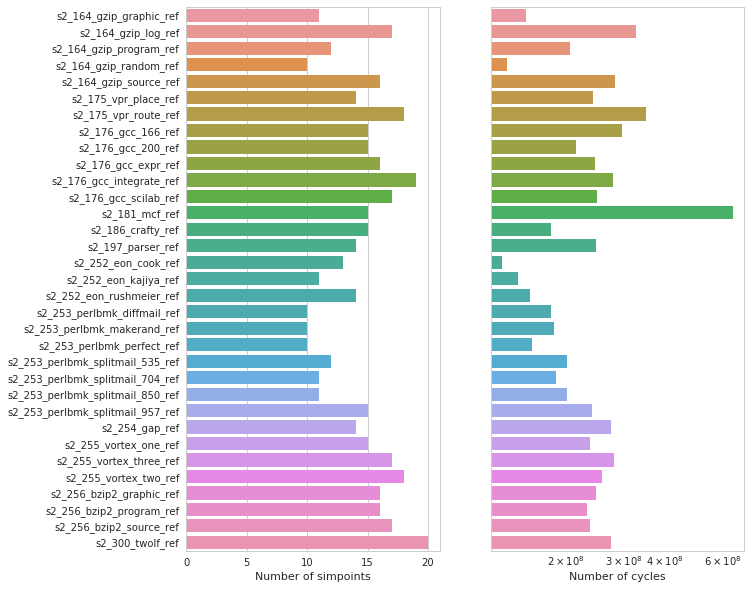

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 10))

plot_df = df.groupby("test")["simpoint"].nunique()
sns.barplot(y=plot_df.index, x=plot_df, ax=ax1)
ax1.set(ylabel="", xlabel="Number of simpoints")

plot_df = df.groupby("test")["cycles"].sum()
sns.barplot(y=plot_df.index, x=plot_df, ax=ax2)
ax2.set(ylabel="", xlabel="Number of cycles")
ax2.set_xscale("log", nonposx='clip')

Let's calculate the IPC (Instructions per cycle) per test and show it on a graph. 

In [17]:
df["ipc"] = df["instructions"] / df["cycles"]
df[["test", "simpoint", "window", "instructions", "cycles", "ipc"]].head()

,test,simpoint,window,instructions,cycles,ipc
120099,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,99999,99999,81301,1.229985
120100,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,199999,100000,35028,2.854859
120101,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,299999,100000,37753,2.648796
120102,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,399999,100000,38449,2.600848
120103,s2_164_gzip_graphic_ref,i10m_k20_c00_w00054,499999,100000,33735,2.964280


We can easily show the average IPC per test with a bar plot, but this is loosing a lot of information. We do not know if the IPC is stable for all the simpoints and instruction windows, or if it varies a lot.

Instead, we can show the data as "box plots". A box plot is used to represent statistical data, as it represents:
* The median
* The repartition (25% to 75% of the points)
* The "outliers": points that are very far from the standard distribution.

From Wikipedia:
![Boxplot](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/250px-Boxplot_vs_PDF.svg.png)

Let's get the same boxes for the IPC:

/usr/lib/python3/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


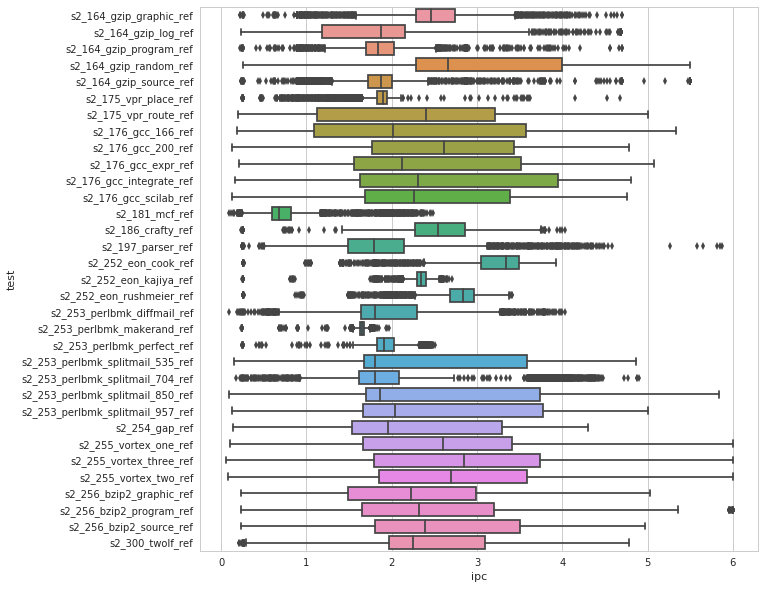

In [18]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.boxplot(y="test", x="ipc", data=df)

This shows quite a lot of information:
* When a box is small, most of the data points are in a small range. It means that the IPC does not vary a lot during the execution. For example, `s2_252_eon_kajiay_ref` has a quite small IPC, but almost all the points are between 2.3 and 2.4, but there are some "outliers" which are far from this distribution:

In [19]:
df[df["test"] == "s2_252_eon_kajiya_ref"]["ipc"].describe()

count    3311.000000
mean        2.326911
std         0.185938
min         0.249381
25%         2.292500
50%         2.348024
75%         2.399491
max         2.704238
Name: ipc, dtype: float64

[]

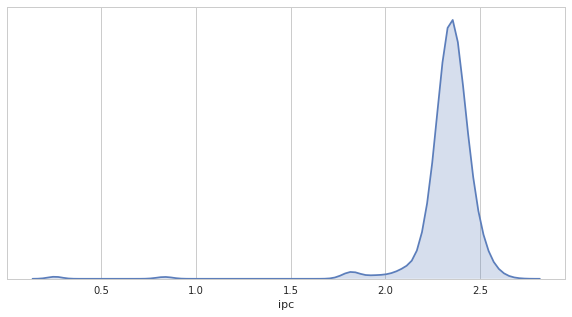

In [20]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.distplot(df[df["test"] == "s2_252_eon_kajiya_ref"]["ipc"], hist=False, 
             kde_kws={"shade": True}, ax=ax)
plt.setp(ax, yticks=[])

On the opposite, test "s2_176_gcc_166_ref" has a quite wide distribution, it means that the IPC varies a lot during the test.

[]

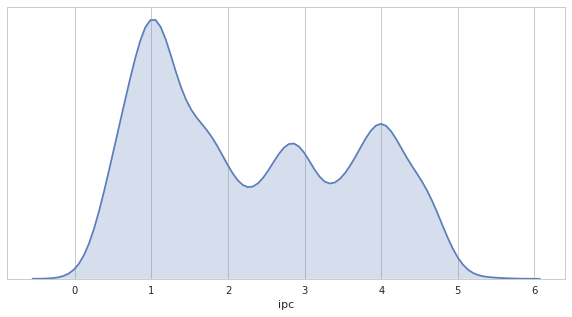

In [21]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.distplot(df[df["test"] == "s2_176_gcc_166_ref"]["ipc"], hist=False, 
             kde_kws={"shade": True}, ax=ax)
plt.setp(ax, yticks=[])

Let's show the distribution of instructions for the tests. I am interested in two things:
* The distribution of instructions for the Core
* The distribution of instructions for the Data-engine

I will show it on 2 subplots:

In [22]:
df1=df.groupby("test").sum()


In [23]:
df1

,window,instructions,cycles,barrier,load - SVE Int,load - gather,store - structure,store - SVE Int,store - scatter,crypto - gpr,...,load - structure,load - scalar Int,store - gpr,store - scalar Int,dp - gpr,dp - scalar Int,dp - scalar FP,dp - vector Int,total_instr,ipc
test,,,,,,,,,,,,,,,,,,,,,
s2_164_gzip_graphic_ref,49995048752,330052052,150609743,0,0,0,0,0,0,0,...,88,221159,25501601,221156,175086466,0,0,2212112,546723387012,8035.092364
s2_164_gzip_log_ref,77265075344,510080444,326612045,0,0,0,0,0,0,0,...,136,1601043,27301624,1601042,272279625,0,0,16012081,2994415134580,9258.766737
s2_164_gzip_program_ref,54540053184,360056784,204930488,0,0,0,0,0,0,0,...,96,253914,16665139,253913,198495285,0,0,2539792,3685172634648,6760.712906
s2_164_gzip_random_ref,45450044320,300047320,132168353,0,0,0,0,0,0,0,...,80,221160,25494425,221161,167854974,0,0,2212048,4064433872060,8426.765077
s2_164_gzip_source_ref,72720070912,480075712,281173394,0,0,0,0,0,0,0,...,128,725279,26518130,725272,261973223,0,0,7253994,8381630456352,9005.520515
s2_175_vpr_place_ref,63630062048,420066248,240485653,0,0,0,18940,0,0,0,...,16888,13728282,24782983,6959336,196955788,6502035,28347336,6509,9230525759028,7655.481596
s2_175_vpr_route_ref,81810079776,540085176,350335085,0,0,0,6,0,0,0,...,14116,16224988,40787821,2585754,247144333,125872,13283329,131116,14468869040652,12079.528498
s2_176_gcc_166_ref,68175066480,450070980,295039543,0,0,0,184,0,0,0,...,144,266608,32560882,397374,210912968,1645,3648,497574,14292668389380,10460.252551
s2_176_gcc_200_ref,68175066480,450070980,213815909,0,0,0,65,0,0,0,...,153,53960,32167556,329874,217778554,2132,4621,61413,16324738864080,11753.929751


/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0,0.5,'Instructions ratio')]

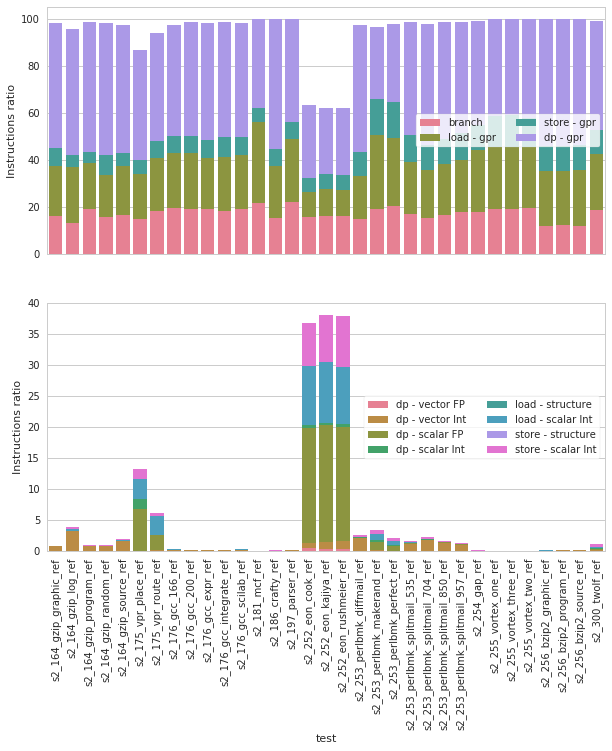

In [24]:
plot_df = df.groupby("test").sum().reset_index()
    
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
plt.xticks(rotation=90)

features = ["branch", "load - gpr", "store - gpr", "dp - gpr"]
palette = sns.husl_palette(len(features))
bottom = plot_df["instructions"] * 0
for feature in features:
    plot_df[feature] = plot_df[feature] / plot_df["instructions"] * 100
    sns.barplot(x="test", y=feature, data=plot_df, label=feature, bottom=bottom, color=palette.pop(0), ax=ax1)
    bottom = bottom + plot_df[feature]

ax1.legend(ncol=2, loc="center right", frameon=True)
ax1.set(ylabel="Instructions ratio", xlabel="")

features = ["dp - vector FP", "dp - vector Int", "dp - scalar FP", "dp - scalar Int", "load - structure", 
            "load - scalar Int", "store - structure", "store - scalar Int"]
palette = sns.husl_palette(len(features))
bottom = plot_df["instructions"] * 0
for feature in features:
    plot_df[feature] = plot_df[feature] / plot_df["instructions"] * 100
    sns.barplot(x="test", y=feature, data=plot_df, label=feature, bottom=bottom, color=palette.pop(0), ax=ax2)
    bottom = bottom + plot_df[feature]

ax2.legend(ncol=2, loc="center right", frameon=True)
ax2.set(ylabel="Instructions ratio")

# Interactive graphs

Most of the time, static graphs like above are enough. But for some data, the graph itself shows too many points, or we want to be able to be able to see details for some parts.

For example, let's focus on a single test, "s2_176_gcc_166_ref", which shows a wide distribution of IPC. 

In [25]:
df
test = "s2_176_gcc_166_ref"
test_df = df[df['test'] == test]
test_df[["simpoint", "window", "ipc", "total_instr"]].head()

,simpoint,window,ipc,total_instr
67424,i10m_k20_c00_w14773,99999,0.475527,2940563735
67425,i10m_k20_c00_w14773,199999,1.429879,2940663735
67426,i10m_k20_c00_w14773,299999,1.554267,2940763735
67427,i10m_k20_c00_w14773,399999,1.466340,2940863735
67428,i10m_k20_c00_w14773,499999,1.039382,2940963735


We can show it on a graph, but this is very difficult to read as it contains too many points:

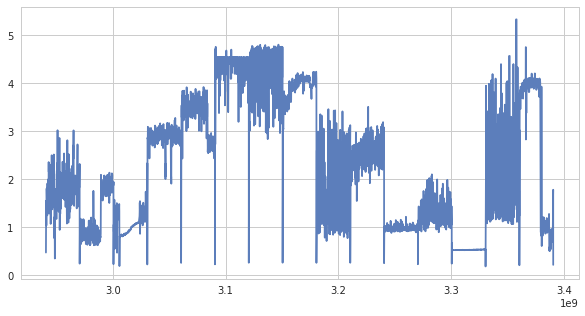

In [26]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(test_df["total_instr"], test_df["ipc"])

On way to show it is to downscale the data, for example with a rolling mean (Average on 100 points). But this is loosing quite a lot of precision:

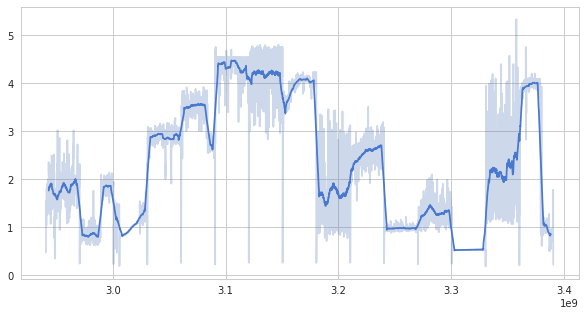

In [27]:
rolling = 50
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(test_df["total_instr"], test_df["ipc"], alpha=.3)
ax.plot(test_df["total_instr"], test_df["ipc"].rolling(rolling, center=True).mean(), color="b")

It would be better to get interactive graphs, in which we can zoom the parts we want. One way to do it is to use:
* [HighCharts](http://www.highcharts.com/demo), which is a Javascript library to draw interactive graphs. Data is normally transferred to Javascript through a JSON dump.
* `python-highchart` library, which is a wrapper on the `HighChart` library.

It is quite easy to create a Highchart graph with the same data. We can also add bands showing the simpoint tests:

In [28]:
test_df

,suite,test,simpoint,window,instructions,cycles,barrier,load - SVE Int,load - gather,store - structure,...,load - structure,load - scalar Int,store - gpr,store - scalar Int,dp - gpr,dp - scalar Int,dp - scalar FP,dp - vector Int,total_instr,ipc
67424,specInt2000,s2_176_gcc_166_ref,i10m_k20_c00_w14773,99999,99999,210291,0,0,0,0,...,8,68,12284,1412,43961,0,5,64,2940563735,0.475527
67425,specInt2000,s2_176_gcc_166_ref,i10m_k20_c00_w14773,199999,100000,69936,0,0,0,0,...,0,45,14053,589,41467,0,0,0,2940663735,1.429879
67426,specInt2000,s2_176_gcc_166_ref,i10m_k20_c00_w14773,299999,100000,64339,0,0,0,0,...,0,0,12221,96,42004,0,0,0,2940763735,1.554267
67427,specInt2000,s2_176_gcc_166_ref,i10m_k20_c00_w14773,399999,100000,68197,0,0,0,0,...,0,0,10076,96,40851,0,0,0,2940863735,1.466340
67428,specInt2000,s2_176_gcc_166_ref,i10m_k20_c00_w14773,499999,100000,96211,0,0,0,0,...,0,3,10961,122,42117,0,0,41,2940963735,1.039382
67429,specInt2000,s2_176_gcc_166_ref,i10m_k20_c00_w14773,599999,100000,67041,0,0,0,0,...,0,4,11579,92,42279,0,0,0,2941063735,1.491625
67430,specInt2000,s2_176_gcc_166_ref,i10m_k20_c00_w14773,699999,100000,55287,0,0,0,0,...,0,8,11811,40,42077,0,0,0,2941163735,1.808743
67431,specInt2000,s2_176_gcc_166_ref,i10m_k20_c00_w14773,799999,100000,63359,0,0,0,0,...,0,70,11265,246,42518,0,0,0,2941263735,1.578308
67432,specInt2000,s2_176_gcc_166_ref,i10m_k20_c00_w14773,899999,100000,64424,0,0,0,0,...,0,48,11071,200,42056,0,0,0,2941363735,1.552217
67433,specInt2000,s2_176_gcc_166_ref,i10m_k20_c00_w14773,999999,100000,56852,0,0,0,0,...,0,0,10300,136,43932,0,0,0,2941463735,1.758953


In [29]:
test_df.groupby("simpoint").last()

,suite,test,window,instructions,cycles,barrier,load - SVE Int,load - gather,store - structure,store - SVE Int,...,load - structure,load - scalar Int,store - gpr,store - scalar Int,dp - gpr,dp - scalar Int,dp - scalar FP,dp - vector Int,total_instr,ipc
simpoint,,,,,,,,,,,,,,,,,,,,,
i10m_k20_c00_w14773,specInt2000,s2_176_gcc_166_ref,30004732,4733,19396,0,0,0,0,0,...,0,3,481,27,1992,0,0,0,2970468468,0.244019
i10m_k20_c01_w01657,specInt2000,s2_176_gcc_166_ref,30004732,4733,20297,0,0,0,0,0,...,0,0,457,0,1891,0,0,0,3000473200,0.233187
i10m_k20_c02_w00146,specInt2000,s2_176_gcc_166_ref,30004732,4733,20805,0,0,0,0,0,...,0,0,578,0,1742,0,0,0,3030477932,0.227493
i10m_k20_c03_w05265,specInt2000,s2_176_gcc_166_ref,30004732,4733,18256,0,0,0,0,0,...,0,0,446,0,1989,0,0,0,3060482664,0.259257
i10m_k20_c04_w02340,specInt2000,s2_176_gcc_166_ref,30004732,4733,20646,0,0,0,0,0,...,0,0,145,0,1839,0,0,0,3090487396,0.229245
i10m_k20_c05_w29936,specInt2000,s2_176_gcc_166_ref,30004732,4733,18028,0,0,0,0,0,...,0,0,145,0,2271,0,0,0,3120492128,0.262536
i10m_k20_c06_w07459,specInt2000,s2_176_gcc_166_ref,30004732,4733,17967,0,0,0,0,0,...,0,0,145,0,3223,0,0,0,3150496860,0.263427
i10m_k20_c07_w00585,specInt2000,s2_176_gcc_166_ref,30004732,4733,18160,0,0,0,0,0,...,0,0,156,0,2973,0,0,0,3180501592,0.260628
i10m_k20_c08_w05558,specInt2000,s2_176_gcc_166_ref,30004732,4733,18029,0,0,0,0,0,...,0,0,145,0,2139,0,0,0,3210506324,0.262521


In [30]:
from highcharts import Highchart

options = {
    'title': {'text': 'IPC for test ' + test},
    'chart': {'zoomType': 'x'},
    'xAxis': {
        'reversed': False,
        'title': {'enabled': True, 'text': 'Instructions'},
        'maxPadding': 0.05,
        'showLastLabel': True
    },
    'yAxis': {
        'title': {'text': 'IPC'},
        'lineWidth': 2
    },
    'legend': {
        'enabled': True
    },
    'tooltip': {
        'headerFormat': '<b>{series.name}</b><br/>',
        'pointFormat': '{point.x} cycles: {point.y} instructions per cycle'
    }
}

start, color = 0, False
bands = []
for name, cycle in test_df.groupby("simpoint")["total_instr"].last().iteritems():
    bands.append({'color': '#FCFFC5' if color else "#FFFFFF",
                  'from': start, 
                  'to': cycle,
                  'label': {'text': name, 'align': 'left', 'rotation': 90}})
    start = cycle
    color = not color
    
options['xAxis']["plotBands"] = bands

chart = Highchart()
chart.set_dict_options(options)

data = list(zip(test_df["total_instr"].tolist(), test_df["ipc"].tolist()))
chart.add_data_set(data, series_type="line", name="IPC")

data = list(zip(test_df["total_instr"].tolist(), test_df["ipc"].rolling(window=rolling, center=True).mean().tolist()))
chart.add_data_set(data, series_type="line", name="IPC (average on {} points)".format(rolling))

chart

In the same way, we can get the ratio of instructions during the test:

In [31]:
options = {
    'title': {'text': 'Ratio of instructions for ' + test},
    'chart': {'zoomType': 'x'},
    'xAxis': {
        'reversed': False,
        'title': {'enabled': True, 'text': 'Instructions'},
        'maxPadding': 0.05,
        'showLastLabel': True
    },
    'yAxis': {
        'title': {'text': 'Ratio of instructions'},
        'lineWidth': 2,
        'labels': {'formatter': "function () { return this.value + '%'; }"}
    },
    'legend': {
        'enabled': True
    },
    'tooltip': {
        'headerFormat': '<b>{series.name}</b><br/>',
        'pointFormat': '{point.x} cycles: {point.y}%'
    }
}

options['xAxis']["plotBands"] = bands

chart = Highchart()
chart.set_dict_options(options)

features = ["branch", "load - gpr", "store - gpr", "dp - gpr"]
for feature in features:
    test_df.loc[:,feature] /= test_df["instructions"] / 100
    data = list(zip(test_df["total_instr"].tolist(), test_df[feature].tolist()))
    chart.add_data_set(data, series_type="line", name=feature)

chart

/usr/lib/python3/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Is there a direct relation-ship between proportion of DP instructions and IPC, or proportion of Load instructions and IPC? Not really obvious there is some correlation...

/usr/lib/python3/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


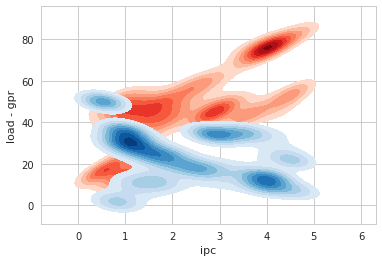

In [32]:
ax = sns.kdeplot(test_df["ipc"], test_df["dp - gpr"],
                 cmap="Reds", shade=True, shade_lowest=False, label="dp - gpr")
ax = sns.kdeplot(test_df["ipc"], test_df["load - gpr"],
                 cmap="Blues", shade=True, shade_lowest=False, label="load - gpr")

# Conclusion

## When should it NOT be used?
Of course there are cases in which this type of flow may not be used:
* The learning curve is not so small. You will need to spend time to get some first results. So if you only use it once a year or less...
* Depending on the data, Excel may be the best option. It can also be more interactive. For example you select a test name in a cell and the graph changes automatically.

## When can it be used?

It can be used in a lot of occasions:
* The data could be in an excel file, but it could also be loaded from a lot of other formats (For example Json files, specific formats, etc)
* When you have very big data, for example 500k lines, a lot of columns
* When the data needs to be preprocessed for each graph to extract the information you need.
* When you want some complex graphs, showing several information at the same time
* When you need interactive graphs to be able to zoom for example.

This is also particularly useful when you want to share some conclusions, but show the full context, and make sure that it can be reproduced. In this case, share the .ypnb file and the data which is loaded.

If you do not want to share the .ypnb file, you can share a PDF or HTML file of the result.

This type of notebook may also be useful to draw graphs that you only want to copy-paste to other documents, for example a word document, in which case you do not need to share the .ypnb file. But in this case, it is better to export the picture as .svg files (Which can rescale in the document).

In [33]:
import pandas as pd

In [34]:
df = pd.DataFrame({'A': [1,1, 1,1,1,1], 'B': [1,1, 1,1,1,1], 'C': [1,1, 1,1,1,1], 'D': [1,1, 1,1,1,1], 'E': [1,1, 1,1,1,1], 'F': [1,1, 1,1,1,1]})

In [35]:
df

,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,1,1,1,1,1,1


In [36]:
import random

col = ['A', 'B', 'C', 'D', 'E', 'F']
print(random.choice(col))

C


In [37]:
index = [0, 1, 2, 3, 4, 5]
print(random.choice(index))

3


In [38]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

In [39]:
result_list= []
dup = 0
for count in range(1000000):
    test = df.copy(deep=True)
    for n in range(6):
        j = random.choice(col)
        i = random.choice(index)
        if test.loc[i, j] != 0:
            test.loc[i, j] = 0
        else:
            continue
    x=(int(test['A'].sum())%2 == 0) and (int(test['B'].sum())%2 == 0) and (int(test['C'].sum())%2 == 0) and (int(test['D'].sum())%2 == 0) and (int(test['E'].sum())%2 == 0) and (int(test['F'].sum())%2 == 0)
    y = (test.iloc[0].sum() % 2 == 0) and (test.iloc[1].sum() % 2 == 0) and (test.iloc[2].sum() % 2 == 0) and (test.iloc[3].sum() % 2 == 0) and (test.iloc[4].sum() % 2 == 0) and (test.iloc[5].sum() % 2 == 0)
    if x and y:
        for l in result_list:
            if test.equals(l):
                dup = 1
                break
        if dup == 0:
            display(test)
            result_list.append(test)
        else:
            continue

,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,0,1,0,1,1
3,1,1,1,1,1,1
4,1,0,0,1,1,1
5,1,1,0,0,1,1


,A,B,C,D,E,F
0,0,1,1,1,1,0
1,0,1,1,0,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,1,1,1,0,1,0


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,0,1,1,0,1
3,1,1,1,1,1,1
4,1,0,1,0,1,1
5,1,1,1,0,0,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,0,0,1,1,1
4,0,1,0,1,1,1
5,0,0,1,1,1,1


,A,B,C,D,E,F
0,1,0,1,1,0,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,0,1,1,0,1
4,1,1,1,1,1,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,0,0,1,1
2,1,1,1,1,1,1
3,0,1,1,0,1,1
4,0,1,0,1,1,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,0,0,1,1,1
1,1,0,1,1,1,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,0,1,1,0
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,0,1,1,1,0
2,1,1,1,1,1,1
3,0,0,1,1,1,1
4,1,1,1,1,1,1
5,0,1,1,1,1,0


,A,B,C,D,E,F
0,1,1,0,1,0,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,0,0,1,1
5,1,1,1,0,0,1


,A,B,C,D,E,F
0,1,1,0,1,0,1
1,1,1,0,1,1,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,0,0
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,0,1,1,0,1,1
2,1,1,1,1,1,1
3,1,1,0,0,1,1
4,0,1,0,1,1,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,0,1,0,1
4,1,1,1,1,1,1
5,1,1,0,1,0,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,0,1,0,1,1,1
3,1,1,0,0,1,1
4,0,1,1,0,1,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,0,0,1
3,0,1,1,1,0,1
4,1,1,1,1,1,1
5,0,1,1,0,1,1


,A,B,C,D,E,F
0,0,1,0,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,0,0,1,1,1,1
5,1,0,0,1,1,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,0,1,1,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,0,1,1,0
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,0,1,1,0
1,1,0,1,1,1,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,1,0,0,1,1,1


,A,B,C,D,E,F
0,1,0,1,1,0,1
1,1,0,1,1,0,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,0,1,0,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,0,1,1,1,0
4,1,1,1,1,1,1
5,1,1,1,0,1,0


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,0,1,1,0,1
2,1,1,1,1,1,1
3,1,1,0,1,0,1
4,1,1,1,1,1,1
5,1,0,0,1,1,1


,A,B,C,D,E,F
0,1,0,1,1,1,0
1,1,1,1,0,1,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,0,1,0,1,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,1,0,1,0
1,1,1,1,1,0,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,0,0,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,1,0,1,0
2,1,1,1,1,1,1
3,1,1,1,1,0,0
4,1,1,1,1,1,1
5,1,1,1,0,0,1


,A,B,C,D,E,F
0,1,1,1,0,1,0
1,1,1,1,1,1,1
2,1,1,1,0,0,1
3,1,1,1,1,1,1
4,1,1,1,1,0,0
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,1,1,0,0
1,1,0,1,1,0,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,1,0,1,1,1,0


,A,B,C,D,E,F
0,1,1,1,1,0,0
1,1,1,1,1,1,1
2,1,1,1,0,0,1
3,1,1,1,0,1,0
4,1,1,1,1,1,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,0,1,1,1,0,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,0,1,0,1
4,0,1,0,1,1,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,0,0,1,1,1
4,1,0,0,1,1,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,0,1,1,0
1,1,1,1,1,1,1
2,0,1,0,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,0,1,1,1,1,0


,A,B,C,D,E,F
0,0,0,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,0,1,1,0,1
4,0,1,1,1,0,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,0,1,1,0
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,0,1,1,1,1,0
4,0,1,0,1,1,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,0,1,1,0,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,0,1,1,1,0,1
5,0,0,1,1,1,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,0,0,1,1,1
2,1,0,1,1,1,0
3,1,1,1,1,1,1
4,1,1,0,1,1,0
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,0,0,1,1
2,1,1,1,1,1,1
3,1,1,0,1,0,1
4,1,1,1,1,1,1
5,1,1,1,0,0,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,0,1,0,1,1
2,1,0,1,1,1,0
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,1,1,1,0,1,0


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,0,1,0,1,1,1
3,1,1,1,1,1,1
4,0,1,1,0,1,1
5,1,1,0,0,1,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,0,0,1,1,1,1
3,0,1,1,1,1,0
4,1,1,1,1,1,1
5,1,0,1,1,1,0


,A,B,C,D,E,F
0,1,0,0,1,1,1
1,1,1,1,1,1,1
2,1,0,1,1,0,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,1,1,0,1,0,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,0,1,0
5,1,1,1,0,1,0


,A,B,C,D,E,F
0,1,1,0,0,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,1,1,0,0,1,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,0,1,1,0,1
3,1,1,1,1,1,1
4,1,1,0,1,0,1
5,1,0,0,1,1,1


,A,B,C,D,E,F
0,1,1,1,1,0,0
1,1,1,1,0,1,0
2,1,1,1,1,1,1
3,1,1,1,0,0,1
4,1,1,1,1,1,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,0,0,1,1,1,1
2,1,1,1,1,1,1
3,0,0,1,1,1,1
4,1,1,1,1,1,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,1,0,0,1
1,1,1,1,1,0,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,1,1,1,0,1,0


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,0,0,1,1,1
4,1,1,0,1,0,1
5,1,0,1,1,0,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,0,1,1,0,1
3,1,1,1,1,1,1
4,1,0,0,1,1,1
5,1,1,0,1,0,1


,A,B,C,D,E,F
0,0,1,0,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,0,1,1,1,0,1
4,1,1,1,1,1,1
5,1,1,0,1,0,1


,A,B,C,D,E,F
0,1,1,0,1,1,0
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,0,1,0,1,1,1
4,1,1,1,1,1,1
5,0,1,1,1,1,0


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,0,1,1,1,0,1
2,0,1,0,1,1,1
3,1,1,1,1,1,1
4,1,1,0,1,0,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,0,1,0,1
1,1,1,1,1,1,1
2,1,1,0,0,1,1
3,1,1,1,0,0,1
4,1,1,1,1,1,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,0,1,1,1,1,0
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,0,0,1,1,1,1
4,1,1,1,1,1,1
5,1,0,1,1,1,0


,A,B,C,D,E,F
0,0,1,1,1,1,0
1,1,1,1,1,0,0
2,0,1,1,1,0,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,0,0,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,0,0,1,1,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,0,0,1,1,1
3,0,1,0,1,1,1
4,0,0,1,1,1,1
5,1,1,1,1,1,1


,A,B,C,D,E,F
0,1,1,1,1,1,1
1,1,0,1,1,0,1
2,1,1,1,1,1,1
3,1,1,1,0,0,1
4,1,0,1,0,1,1
5,1,1,1,1,1,1


In [40]:
len(result_list)

55

# Hash group

In [41]:
def get_bit(value, bit_index):
    return (value & (1 << bit_index)) >> bit_index

def get_hash2(value):
    return get_bit(value, 6) ^ get_bit(value, 7) ^ get_bit(value, 8) ^ get_bit(value, 9) ^ get_bit(value, 10) ^\
get_bit(value, 11) ^ get_bit(value, 12) ^ get_bit(value, 13) ^ get_bit(value, 14) ^ get_bit(value, 15) ^\
get_bit(value, 16) ^ get_bit(value, 17) ^ get_bit(value, 18) ^ get_bit(value, 19) ^ get_bit(value, 20) ^\
get_bit(value, 21) ^ get_bit(value, 22) ^ get_bit(value, 23) ^ get_bit(value, 24) ^ get_bit(value, 25) ^\
get_bit(value, 26) ^ get_bit(value, 27) ^ get_bit(value, 28) ^ get_bit(value, 29) ^ get_bit(value, 30) ^\
get_bit(value, 31) ^ get_bit(value, 32) ^ get_bit(value, 33) ^ get_bit(value, 34) ^ get_bit(value, 35) ^\
get_bit(value, 36) ^ get_bit(value, 37) ^ get_bit(value, 38) ^ get_bit(value, 39) ^ get_bit(value, 40) ^\
get_bit(value, 41) ^ get_bit(value, 42) ^ get_bit(value, 43) ^ get_bit(value, 44) ^ get_bit(value, 45) ^\
get_bit(value, 46) ^ get_bit(value, 47) ^ get_bit(value, 48) ^ get_bit(value, 49) ^ get_bit(value, 50) ^ get_bit(value, 51)


def get_hash4(value):
    return (get_bit(value, 6) ^ get_bit(value, 8) ^ get_bit(value, 10) ^\
get_bit(value, 12) ^ get_bit(value, 14) ^ get_bit(value, 16) ^ get_bit(value, 18) ^ get_bit(value, 20) ^\
get_bit(value, 22) ^ get_bit(value, 24) ^ get_bit(value, 26) ^\
get_bit(value, 28) ^ get_bit(value, 30) ^ get_bit(value, 32) ^ get_bit(value, 34) ^ get_bit(value, 36) ^\
get_bit(value, 38) ^ get_bit(value, 40) ^ get_bit(value, 42) ^ get_bit(value, 44) ^ get_bit(value, 46) ^\
get_bit(value, 48) ^ get_bit(value, 50)) | \
((get_bit(value, 7) ^ get_bit(value, 9) ^ get_bit(value, 11) ^ get_bit(value, 13) ^ get_bit(value, 15) ^\
get_bit(value, 17) ^ get_bit(value, 19) ^ get_bit(value, 21) ^ get_bit(value, 23) ^ get_bit(value, 25) ^\
get_bit(value, 27) ^ get_bit(value, 29) ^ get_bit(value, 31) ^ get_bit(value, 33) ^ get_bit(value, 35) ^\
get_bit(value, 37) ^ get_bit(value, 39) ^ get_bit(value, 41) ^ get_bit(value, 43) ^ get_bit(value, 45) ^\
get_bit(value, 47) ^ get_bit(value, 49) ^ get_bit(value, 51)) << 1)



def get_hash8(value):
    return  get_bit(value, 6) ^  get_bit(value, 9) ^ get_bit(value, 12) ^ get_bit(value, 15) ^\
get_bit(value, 18) ^ get_bit(value, 21) ^ get_bit(value, 24) ^ get_bit(value, 27) ^\
get_bit(value, 30) ^ get_bit(value, 33) ^ get_bit(value, 36) ^ get_bit(value, 39) ^\
get_bit(value, 42) ^ get_bit(value, 45) ^ get_bit(value, 48) ^ get_bit(value, 51) |\
((get_bit(value, 7) ^ get_bit(value, 10) ^ get_bit(value, 13) ^ get_bit(value, 16) ^\
get_bit(value, 19) ^ get_bit(value, 22) ^ get_bit(value, 25) ^ get_bit(value, 28) ^\
get_bit(value, 31) ^ get_bit(value, 34) ^ get_bit(value, 37) ^ get_bit(value, 40) ^\
get_bit(value, 43) ^ get_bit(value, 46) ^ get_bit(value, 49)) << 1) |\
((get_bit(value, 8) ^ get_bit(value, 11) ^ get_bit(value, 14) ^ get_bit(value, 17) ^\
get_bit(value, 20) ^ get_bit(value, 23) ^ get_bit(value, 26) ^ get_bit(value, 29) ^\
get_bit(value, 32) ^ get_bit(value, 35) ^ get_bit(value, 38) ^ get_bit(value, 41) ^\
get_bit(value, 44) ^ get_bit(value, 47) ^ get_bit(value, 50)) << 2)




In [42]:
print (get_hash8(64))
print (get_hash8(128))
print (get_hash8(192))
print (get_hash8(256))

1
2
3
4


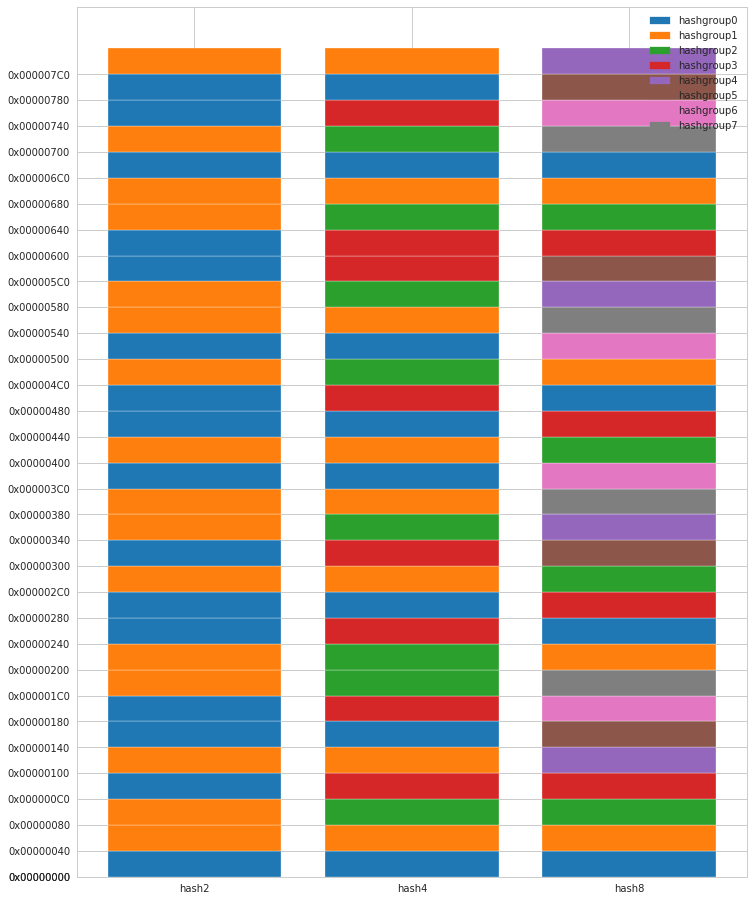

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.patches as mpatches



colors=list(mcolors.TABLEAU_COLORS.keys())

x1 = [0]
x2 = [1]
x3 = [2]


cacheline = np.array([64])
addr = 0
lastbar = np.array([0])

#add colors
#colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']
# The position of the bars on the x-axis

barWidth = 1
#plot bars
#plt.figure(figsize=(12,16))
fig, ax = plt.subplots(figsize = (12,16))

ax.set_xticks([0, 1, 2])

ax.set_xticklabels(["hash2", "hash4", "hash8"])


#plt.bar(x, cacheline, color=colors[1], edgecolor='white', label="0")
ytick = [0]


while addr < 0x800:
    plt.bar(x1, cacheline, bottom=np.array(lastbar),color=colors[get_hash2(addr)], edgecolor='white', label="hash2")
    plt.bar(x2, cacheline, bottom=np.array(lastbar),color=colors[get_hash4(addr)], edgecolor='white', label="hash4")
    plt.bar(x3, cacheline, bottom=np.array(lastbar),color=colors[get_hash8(addr)], edgecolor='white', label="hash8")
    ytick.append(addr)
    lastbar = lastbar + 64
    addr += 64



legend_hg0 = mpatches.Patch(color=colors[0], label='hashgroup0')
legend_hg1 = mpatches.Patch(color=colors[1], label='hashgroup1')
legend_hg2 = mpatches.Patch(color=colors[2], label='hashgroup2')
legend_hg3 = mpatches.Patch(color=colors[3], label='hashgroup3')
legend_hg4 = mpatches.Patch(color=colors[4], label='hashgroup4')
legend_hg5 = mpatches.Patch(color=colors[5], label='hashgroup5')
legend_hg6 = mpatches.Patch(color=colors[6], label='hashgroup6')
legend_hg7 = mpatches.Patch(color=colors[7], label='hashgroup7')




plt.legend(handles=[legend_hg0, legend_hg1, legend_hg2, legend_hg3, legend_hg4, legend_hg5, legend_hg6, legend_hg7])
ax.set_yticks(ytick);
ylabels = map(lambda t: '0x%08X' % int(t), ax.get_yticks())    
ax.set_yticklabels(ylabels);
    
#plt.bar(x, tshirt, bottom=np.array(jeans), color=colors[1], edgecolor='white', width=barWidth, label='tshirt')
#plt.bar(x, formal_shirt, bottom=np.array(jeans)+np.array(tshirt), color=colors[2], edgecolor='white', width=barWidth, label='formal shirt')
plt.show()